In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
# 2. Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
# 3. Define the ANN model
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # Input: 784 (28*28), Hidden layer: 512
        self.fc2 = nn.Linear(512, 256)      # Hidden layer: 256
        self.fc3 = nn.Linear(256, 128)      # Hidden layer: 128
        self.fc4 = nn.Linear(128, 10)       # Output: 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model, loss, optimizer
model = FashionMNISTModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
# 4. Training function
def train(model, loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(loader):.4f}')

# 5. Evaluate function
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

In [5]:
# 6. Visualize some predictions
def visualize_predictions(model, loader):
    model.eval()
    images, labels = next(iter(loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    # Plot the first 10 test images and their predicted labels
    fig = plt.figure(figsize=(10, 5))
    for idx in range(10):
        ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
        ax.imshow(images[idx].cpu().reshape(28, 28), cmap='gray')
        ax.set_title(f'Pred: {preds[idx].item()}')
    plt.show()

In [6]:
# 7. Train the model
train(model, train_loader, criterion, optimizer, epochs=50)

Epoch [1/50], Loss: 0.5016
Epoch [2/50], Loss: 0.3698
Epoch [3/50], Loss: 0.3343
Epoch [4/50], Loss: 0.3064
Epoch [5/50], Loss: 0.2849
Epoch [6/50], Loss: 0.2696
Epoch [7/50], Loss: 0.2538
Epoch [8/50], Loss: 0.2427
Epoch [9/50], Loss: 0.2314
Epoch [10/50], Loss: 0.2156
Epoch [11/50], Loss: 0.2078
Epoch [12/50], Loss: 0.1970
Epoch [13/50], Loss: 0.1869
Epoch [14/50], Loss: 0.1808
Epoch [15/50], Loss: 0.1697
Epoch [16/50], Loss: 0.1633
Epoch [17/50], Loss: 0.1539
Epoch [18/50], Loss: 0.1523
Epoch [19/50], Loss: 0.1457
Epoch [20/50], Loss: 0.1384
Epoch [21/50], Loss: 0.1296
Epoch [22/50], Loss: 0.1265
Epoch [23/50], Loss: 0.1218
Epoch [24/50], Loss: 0.1145
Epoch [25/50], Loss: 0.1112
Epoch [26/50], Loss: 0.1076
Epoch [27/50], Loss: 0.1066
Epoch [28/50], Loss: 0.1008
Epoch [29/50], Loss: 0.0974
Epoch [30/50], Loss: 0.0966
Epoch [31/50], Loss: 0.0867
Epoch [32/50], Loss: 0.0890
Epoch [33/50], Loss: 0.0859
Epoch [34/50], Loss: 0.0832
Epoch [35/50], Loss: 0.0810
Epoch [36/50], Loss: 0.0749
E

Test Accuracy: 88.91%


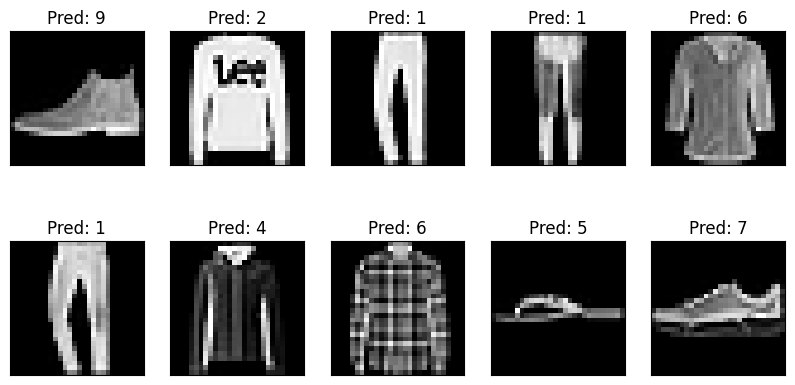

In [7]:
# 8. Evaluate the model on test data
evaluate(model, test_loader)

# 9. Visualize predictions
visualize_predictions(model, test_loader)

In [8]:
# 10. Save model
torch.save(model.state_dict(), 'fashion_mnist_model.pth')